In [26]:
import pandas as pd 

df=pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9535,2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700
9536,2024-01-16,393.660004,394.029999,387.619995,390.269989,390.269989,27202300
9537,2024-01-17,387.980011,390.109985,384.809998,389.470001,389.470001,22234100
9538,2024-01-18,391.720001,393.989990,390.119995,393.869995,393.869995,23392100


In [27]:
df=df[['Date','Close']]

In [28]:
type(df['Date'][0])

str

In [29]:
import datetime

def str_to_datetime(s):
    split=s.split('-')
    year, month, day= int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object


datetime.datetime(1986, 3, 19, 0, 0)

In [30]:
df['Date']=df['Date'].apply(str_to_datetime)

C:\Users\user\AppData\Local\Temp\ipykernel_12468\1499576352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


In [31]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9535,2024-01-12,388.470001
9536,2024-01-16,390.269989
9537,2024-01-17,389.470001
9538,2024-01-18,393.869995


In [32]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-12,388.470001
2024-01-16,390.269989
2024-01-17,389.470001


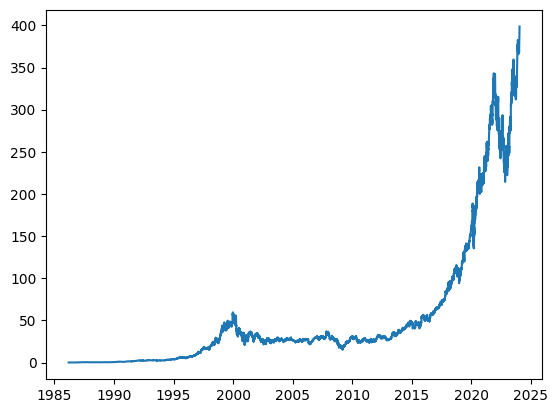

In [34]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np